In [34]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)





import matplotlib.pyplot as plt # plotting library

%matplotlib inline





from keras.models import Sequential

from keras.layers import Dense , Activation, Dropout

from tensorflow.keras.optimizers import Adam ,RMSprop

from keras import  backend as K

In [35]:
from keras.datasets import mnist



(x_train, y_train),(x_test, y_test) = mnist.load_data()



unique, counts = np.unique(y_train, return_counts=True)

print("Train labels: ", dict(zip(unique, counts)))



unique, counts = np.unique(y_test, return_counts=True)

print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
y_train.shape

(60000,)

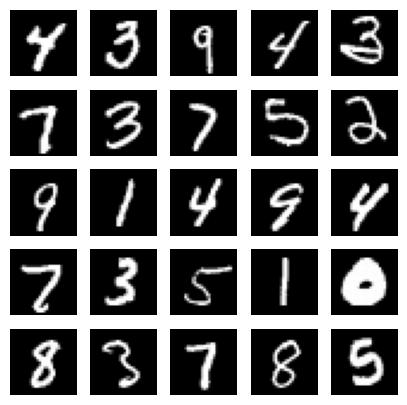

In [38]:
indexes = np.random.randint(0, x_train.shape[0], size=25)

images = x_train[indexes]

labels = y_train[indexes]



# plot the 25 mnist digits

plt.figure(figsize=(5,5))

for i in range(len(indexes)):

    plt.subplot(5, 5, i + 1)

    image = images[i]

    plt.imshow(image, cmap='gray')

    plt.axis('off')

    

plt.show()

plt.savefig("mnist-samples.png")

plt.close('all')

In [39]:
image_size=28

input_size = image_size * image_size

x_train = np.reshape(x_train, [-1, input_size])

x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test, [-1, input_size])

x_test = x_test.astype('float32') / 255

In [8]:
x_train.shape

(60000, 784)

In [9]:
print(y_train.shape)

(60000,)


In [40]:
batch_size = 128

hidden_units = 256

dropout = 0.45

In [24]:
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras import regularizers

In [41]:
num_labels=10

model = Sequential()

#model.add(Dense(784, input_dim=input_size, kernel_regularizer=regularizers.l2(0.001)))

model.add(Dense(784, input_dim=input_size, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

#model.add(Dropout(dropout))

model.add(Dense(784, activation='relu'))

#model.add(Dropout(dropout))

model.add(Dense(784, activation='relu'))

#model.add(Dropout(dropout))

model.add(Dense(500, activation='relu'))

#model.add(Dropout(dropout))

model.add(Dense(500, activation='relu'))

#model.add(Dropout(dropout))

#model.add(Dropout(dropout))

model.add(Dense(256, activation='relu'))

#model.add(Dropout(dropout))

model.add(Dense(100, activation='relu'))

model.add(Dropout(dropout))

#model.add(Dropout(dropout))

model.add(Dense(num_labels))

model.add(Activation('softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
from sklearn.preprocessing import OneHotEncoder

y_train=np.reshape(y_train,(-1,1))

print(y_train.shape)

# creating instance of one-hot-encoder

enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)

#.toarray()

enc_df = enc.fit_transform(y_train).toarray()

print(enc_df.shape)

(60000, 1)
(60000, 10)


In [43]:
y_test=np.reshape(y_test,(-1,1))

enc_df2 = enc.fit_transform(y_test).toarray()

print(enc_df2.shape)

(10000, 10)


In [44]:
model.compile(loss='categorical_crossentropy', 

              optimizer='adam',

              metrics=['accuracy'])

#save_best_only=True

model.fit(x_train, enc_df, epochs=22, batch_size=batch_size, validation_data=(x_test,enc_df2))

Epoch 1/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8254 - loss: 0.9239 - val_accuracy: 0.9564 - val_loss: 0.3482
Epoch 2/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9587 - loss: 0.3276 - val_accuracy: 0.9607 - val_loss: 0.2871
Epoch 3/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9678 - loss: 0.2591 - val_accuracy: 0.9695 - val_loss: 0.2255
Epoch 4/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.2117 - val_accuracy: 0.9687 - val_loss: 0.2119
Epoch 5/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.1924 - val_accuracy: 0.9709 - val_loss: 0.2015
Epoch 6/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.1811 - val_accuracy: 0.9746 - val_loss: 0.1837
Epoch 7/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.1624 - val_accuracy: 0.9687 - val_loss: 0.2099
Epoch 8/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.1601 - val_accuracy: 0.

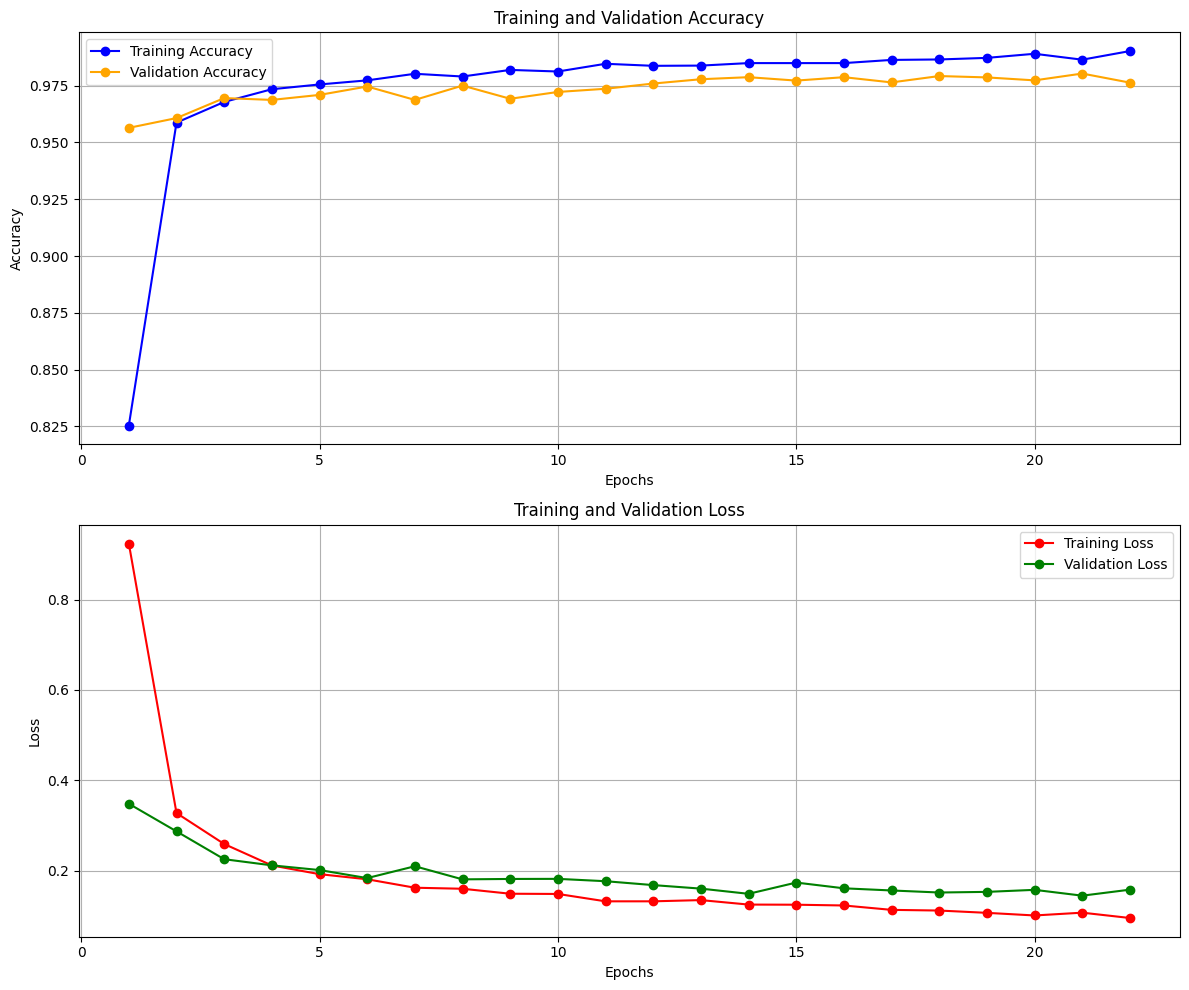

In [49]:
import matplotlib.pyplot as plt

# Data from the training history
epochs = list(range(1, 23))
training_accuracy = [0.8254, 0.9587, 0.9678, 0.9734, 0.9755, 0.9773, 0.9802, 0.9790,
                     0.9819, 0.9812, 0.9846, 0.9837, 0.9838, 0.9849, 0.9849,
                     0.9849, 0.9863, 0.9865, 0.9872, 0.9890, 0.9864, 0.9902]
training_loss = [0.9239, 0.3276, 0.2591, 0.2117, 0.1924, 0.1811, 0.1624, 0.1601,
                 0.1491, 0.1486, 0.1323, 0.1323, 0.1350, 0.1251, 0.1248,
                 0.1231, 0.1134, 0.1119, 0.1068, 0.1010, 0.1072, 0.0954]
validation_accuracy = [0.9564, 0.9607, 0.9695, 0.9687, 0.9709, 0.9746, 0.9687,
                       0.9750, 0.9692, 0.9722, 0.9736, 0.9759, 0.9778, 0.9787,
                       0.9772, 0.9787, 0.9764, 0.9792, 0.9786, 0.9773, 0.9803,
                       0.9763]
validation_loss = [0.3482, 0.2871, 0.2255, 0.2119, 0.2015, 0.1837, 0.2099,
                   0.1809, 0.1818, 0.1820, 0.1768, 0.1682, 0.1604, 0.1489,
                   0.1738, 0.1611, 0.1563, 0.1518, 0.1532, 0.1577, 0.1448,
                   0.1581]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Training Accuracy and Validation Accuracy
ax1.plot(epochs, training_accuracy, label='Training Accuracy', color='blue', marker='o')
ax1.plot(epochs, validation_accuracy, label='Validation Accuracy', color='orange', marker='o')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid()

# Plot Training Loss and Validation Loss
ax2.plot(epochs, training_loss, label='Training Loss', color='red', marker='o')
ax2.plot(epochs, validation_loss, label='Validation Loss', color='green', marker='o')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid()

# Adjust layout
plt.tight_layout()
plt.show()


In [50]:
#Remarques

# c'est ainsi qu'on peux ajouter le regulizer

from tensorflow.keras import layers

from tensorflow.keras import regularizers



layer = layers.Dense(

    units=64,

    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),

    bias_regularizer=regularizers.L2(1e-4),

    activity_regularizer=regularizers.L2(1e-5)

)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       128,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,932,860 (30.26 MB)

 Trainable params: 2,644,286 (10.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,288,574 (20.17 MB)

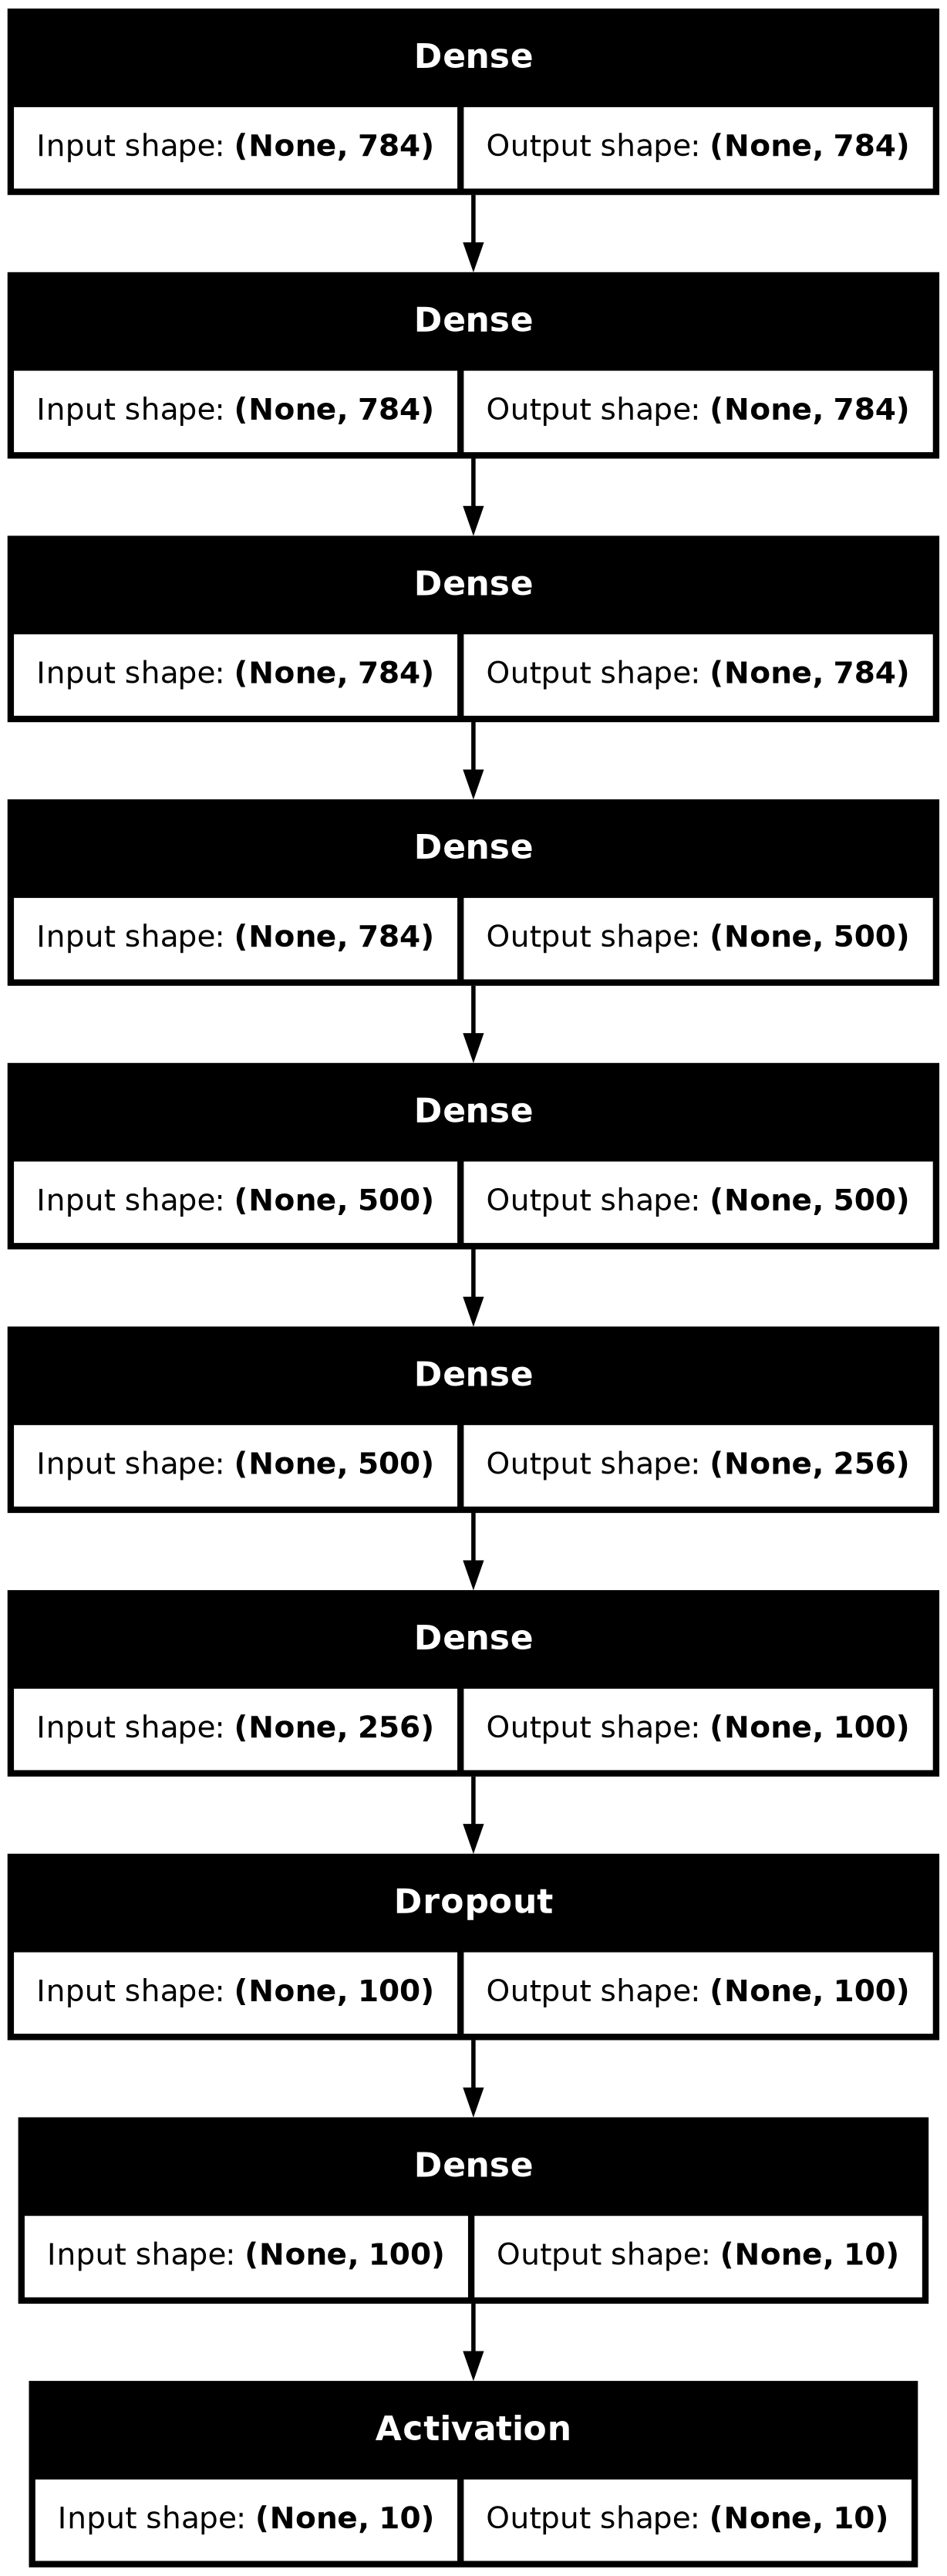

In [51]:


plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [14]:
from keras.callbacks import EarlyStopping

import  keras.metrics as mt

In [52]:
from sklearn.preprocessing import OneHotEncoder

y_train=np.reshape(y_train,(-1,1))

# creating instance of one-hot-encoder

enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)

enc_df = enc.fit_transform(y_train).toarray()

In [53]:
y_train[2]

array([4], dtype=uint8)

In [54]:
print (enc_df[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


les callbacks sont très semblable aux triggers, ils permetent de controler l'arret de l'apprentissage dans cet exemple. 



Une fois que vous appelez fit (... callbacks = [es]) sur votre modèle, Keras appelle des fonctions prédéterminées. Ces fonctions peuvent être appelées en_début_train, en_fin_train, en_début_epoch, en_fin_epoch et en_début_batch, en_fin_batch.



Il est préférable d'utiliser un grand nombre au niveau de patience.

In [56]:
from keras.callbacks import ModelCheckpoint

#keras.losses.SparseCategoricalCrossentropy()

model.compile(loss='categorical_crossentropy', 

              optimizer='adam',

              metrics=['accuracy'])

#save_best_only=True

model.fit(x_train, enc_df, epochs=30, batch_size=batch_size,callbacks=[EarlyStopping(monitor='loss', patience=int(4)), ModelCheckpoint(filepath='./best_model/weights.{epoch:02d}.weights.h5',  monitor='val_loss',save_weights_only=True)])

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9877 - loss: 0.0984
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9881 - loss: 0.0968
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0848
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0875
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0981
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0937
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0893
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.1041
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0816
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9894 - loss: 0.0900
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0871
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [57]:
enc_df2 = enc.fit_transform(y_test).toarray()

In [58]:
loss, acc = model.evaluate(x_test, enc_df2)

print(loss, acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.1723
0.1422169804573059 0.9824000000953674


In [59]:
from sklearn.preprocessing import OneHotEncoder

y_test=np.reshape(y_test,(-1,1))

# creating instance of one-hot-encoder

enc1 = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)

enc_df2 = enc1.fit_transform(y_test).toarray()

In [61]:
from keras.models import load_model

model.load_weights('./best_model/weights.14.weights.h5')

print(model.evaluate(x=x_train, y=enc_df))

print (model.evaluate(x=x_test, y=enc_df2))

#test_acc = saved_model.evaluate(x=x_test, y=enc_df)

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9937 - loss: 0.0707
[0.07021627575159073, 0.9939000010490417]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.1702
[0.14992575347423553, 0.9804999828338623]
